# Web Scraping UCSD Course Catalog
**Currently works with:**
- DSGN https://www.ucsd.edu/catalog/courses/DSGN.html
- EDS https://www.ucsd.edu/catalog/courses/EDS.html *in progress*

In [1]:
# Run if you need bs4
#pip install "ipython-beautifulsoup[bs4]"

In [2]:
# Web Scraping Code
from requests import get
url = 'https://www.ucsd.edu/catalog/courses/DSGN.html'    # Change URL to your UCSD department
response = get(url)

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')   # html_soup = all html code on course catalog page
#print(html_soup)

# Check to see if there are empty tags for course-name/descriptions
for tag in html_soup.find_all():
    if len(tag.get_text(strip=True)) == 0:
        tag.extract()

In [3]:
# Find all paragraph tags w/ 'course-name'
classes = html_soup.find_all('p', class_ = 'course-name')

# Find all paragraph tags w/ 'course-descriptions'
req_sub = html_soup.find_all('p', class_ = 'course-descriptions')

In [4]:
# *****CELL #3*****

class_code = []     # List of course codes
req_super = []      # List of course descriptions
classDict = {}      # Dictionary of KEY (course codes) and VALUE (course descriptions)

# Loop through all classes and append class names to req_super
for i in range(len(classes)):
    class_split = classes[i].text.split(".", 2)     # Separates into course code and course name
    #print(class_split)     # Check for any unusual class codes

    # if unusual class codes:
    #   class_code.append("")
    #   req_super.append(req_sub[i])
    # else:
    class_code.append(class_split[0])   # add course code to class_code
    req_super.append(req_sub[i])        # add course description to req_super
    classDict[class_split[0]] = req_sub[i]    # Class dictionary with KEY (course code) and VALUE (course description)

#print(class_code)
#print(req_super)

# Convert bs4 Tags into prerequisite string
for key in classDict:
    if classDict[key].text.find("Prerequisites:") == -1:    # skip if no prerequisites
        classDict[key] = ''
        continue;
    start = (classDict[key].text.find("Prerequisites:")) + len("Prerequisites:")  # start = index after 'Prerequisites:'
    reqs = classDict[key].text[start:]
    classDict[key] = reqs

classDict   # View prerequisite course description text

{'DSGN 1': '',
 'DSGN 90': '',
 'DSGN 99': ' lower-division standing, completion of thirty units of UC San Diego undergraduate study, a minimum UC San Diego GPA of 3.0, and a completed and approved Special Studies form.',
 'DSGN 100': ' DSGN 1.',
 'DSGN 119': ' COMM 124A or COGS 10 or DSGN 1.',
 'DSGN 160': ' upper-division standing or consent of instructor.',
 'DSGN 161': ' upper-division standing or consent of instructor.',
 'DSGN 195': ' upper-division standing, 3.0 GPA, consent of instructor, and department approval.',
 'DSGN 198': ' upper-division standing, 2.5 GPA, consent of instructor, and department approval.',
 'DSGN 199': ' upper-division standing, 2.5 GPA, consent of instructor, and department approval.',
 'DSGN 260': ' graduate standing and consent of instructor.',
 'DSGN 261': ' graduate standing and consent of instructor.',
 'DSGN 299': ' graduate standing and consent of instructor.'}

In [5]:
# Function for converting clean course description into Lists
# May have to fix for different departments (some departments split with commas, 'and's, etc)
# Inputs: descr = course description (string)
# Output: prereqList = list of prerequisites (nested list)
def convertDescrToPrereqList(descr):
    prereqList = []
    if len(descr) > 5 and any(i.isdigit() for i in descr):      # if descr is longer than 5 char and contains digits
        newreq = descr.split(' and ')                             # First split by 'and's, might have to change to ','
        newreq = [item.strip(',').strip() for item in newreq]     # Strips whitespace
    
        for item in newreq:                                       # Split by 'or's
            items = item.split('or')
            items = [i.strip() for i in items]
            prereqList.append(items)
    elif descr == '':
        return prereqList
    else:
        #print('Error: ', descr)     # double check if these should be included
        return prereqList

    return prereqList

# Test this function with your own examples!!
#print(convertDescrToPrereqList(' upper-division standing or consent of instructor. '))
#print(convertDescrToPrereqList(' COMM 124A and COMM 1 or COGS 10 or DSGN 1. ',))

In [6]:
# Loop through course descriptions and clean prereqs
for key in classDict:
    descr = classDict[key].strip().split(' ')
    for x in range(len(descr)):
        descr[x] = descr[x].strip().strip('.')    # Can keep adding .strip('#') with other punctuation if necessary

        # Clear unnecessary words
        if len(descr[x]) > 4:
            descr[x] = ''
        # Edit accordingly to the words on your course description
        elif '.' in descr[x] or 'of' in descr[x] or 'GPA' in descr[x] or 'UC' in descr[x] or 'San' in descr[x] or descr[x] == 'a':
            descr[x] = ''
    reqs = ' '.join(descr).strip()
    print(reqs)          # print to check for edge cases

    # Uncomment when descriptions are clean: reduced to course codes + 'and' + 'or'
    #classDict[key] = convertDescrToPrereqList(reqs)     # Each KEY (class code) has VALUE (list of prereqs)

#classDict
# *NOTE* IF YOU HAVE ERROR WHEN RERUNNING THIS CELL:
# You must rerun cell #3 so the classDict contains strings again




and   and    form
DSGN 1
COMM 124A or COGS 10 or DSGN 1
or
or
and
and
and
and
and
and


In [7]:
# Result: classDict = dictionary of all course codes and list of prerequisites
"""
Nested lists for 'and' + 'or' explanation
Example: 'COGS 1 and COGS 2 and MATH 1 or MATH 2 or MATH 3'

1. Split by 'and's first
    ['COGS 1', 'COGS 2', 'MATH 1 or MATH 2 or MATH 3']

2. Then split each by 'or's
    [ [COGS 1], [COGS 2], [MATH 1, MATH 2, MATH 3] ]
"""
classDict

{'DSGN 1': '',
 'DSGN 90': '',
 'DSGN 99': ' lower-division standing, completion of thirty units of UC San Diego undergraduate study, a minimum UC San Diego GPA of 3.0, and a completed and approved Special Studies form.',
 'DSGN 100': ' DSGN 1.',
 'DSGN 119': ' COMM 124A or COGS 10 or DSGN 1.',
 'DSGN 160': ' upper-division standing or consent of instructor.',
 'DSGN 161': ' upper-division standing or consent of instructor.',
 'DSGN 195': ' upper-division standing, 3.0 GPA, consent of instructor, and department approval.',
 'DSGN 198': ' upper-division standing, 2.5 GPA, consent of instructor, and department approval.',
 'DSGN 199': ' upper-division standing, 2.5 GPA, consent of instructor, and department approval.',
 'DSGN 260': ' graduate standing and consent of instructor.',
 'DSGN 261': ' graduate standing and consent of instructor.',
 'DSGN 299': ' graduate standing and consent of instructor.'}

# Neo4j Section

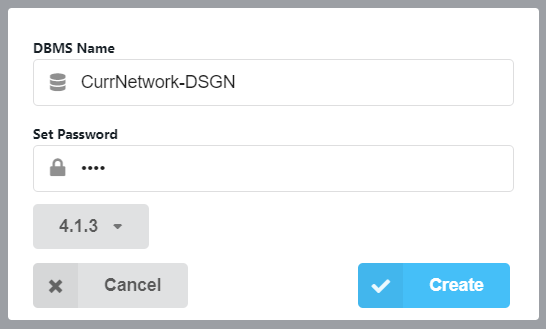
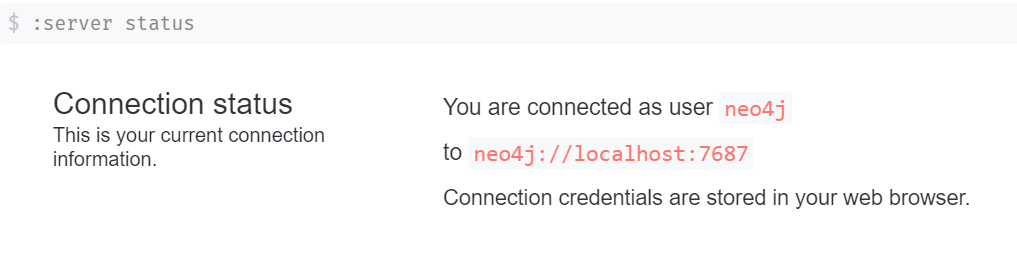


In [8]:
# Run if you need to install neo4j
pip install neo4j

SyntaxError: invalid syntax (<ipython-input-8-036240236c0e>, line 2)

Neo4j Instructions:
1. Add new Local Database
2. Set password = "abcd"
3. Start Database and open
4. Check credentials and match with code:
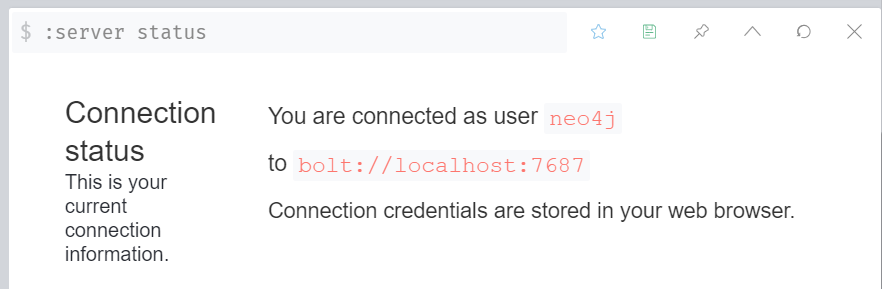

In [9]:
from neo4j import GraphDatabase

# Make sure bolt port # is correct
# auth=(username, password)  --> "You are connected as user *username*" / password set when database was created
uri = "bolt://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "abcd"))

def create_class_node(tx, name):
    tx.run("MERGE (a:Class { name: $name })", name=name)
    
def create_class_node_inter(tx, name):
    tx.run("MERGE (a:Intermediatry { name: $name })", name=name)

# node1=prereq / node2=courseName
def create_relationship(tx, node_one, node_two, weight):
    tx.run("MATCH (a:Class),(f:Class) WHERE a.name=$node_one AND f.name=$node_two CREATE (a)-[:Prerequisite { weight: $weight }]->(f)",
           weight=weight, node_one=node_one, node_two=node_two)

# node1=prereq / node2=internodei / weight=1
def create_relationship_to_inter(tx, node_one, node_two, weight):
    tx.run("MATCH (a:Class),(f:Intermediatry) WHERE a.name=$node_one AND f.name=$node_two CREATE (a)-[:Prerequisite { weight: $weight }]->(f)",
           node_one=node_one, weight=weight, node_two=node_two)

# node1=internodei / node2=courseName / weight=1/ands
def create_relationship_from_inter(tx, node_one, node_two, weight):
    tx.run("MATCH (a:Intermediatry),(f:Class) WHERE a.name=$node_one AND f.name=$node_two CREATE (a)-[:Prerequisite { weight: $weight }]->(f)",
           node_one=node_one, weight=weight, node_two=node_two)

# If this cell runs successfully, you should be connected!

ServiceUnavailable: Failed to establish connection to IPv4Address(('127.0.0.1', 7687)) (reason [Errno 61] Connection refused)

In [ ]:
# Function to create Curriculum Graph Network by looping through the class dictionary
def createCurrNetwork(classDict):                    
    internodes = 1                # Num of internodes, continuously counts
    for key in classDict:
      # Create course node if doesn't already exist
        with driver.session() as session:
            session.write_transaction(create_class_node, key)

        if len(classDict[key]) > 0:   # If prerequisites exist:
            ands = len(classDict[key])    # Num of 'and' relationships -> weight = 1/ands
            for a in range(ands):
                preq = classDict[key][a]
                ors = len(preq)             # Num of 'or' relationships

                if ors == 1:                # No 'or's so no need for inter nodes
                    #print(str(k)+'-and'+str(a)+':', preq[0])            # preq[0] = Prereq Course name
                    with driver.session() as session:
                        session.write_transaction(create_class_node, preq[0])
                        session.write_transaction(create_relationship, preq[0], key, str(1))
                else:
                    # Create inter node for 'or' relationships
                    with driver.session() as session:
                        session.write_transaction(create_class_node_inter, "edsInter" + str(internodes))
                        session.write_transaction(create_relationship_from_inter, "edsInter" + str(internodes), key, str(1/ands))   # ands = num of 'and's

                    for o in range(ors):
                        #print(str(k)+'-'+str(a)+': or'+str(o), preq[o])
                        with driver.session() as session:
                            session.write_transaction(create_class_node, preq[o])
                            session.write_transaction(create_relationship_to_inter, preq[o], "edsInter" + str(internodes), str(1))
                    internodes += 1

In [ ]:
# Make sure classDict is formatted correctly before running Neo4j function
classDict

In [ ]:
# Only run cell ONCE and check Neo4j for graph network
createCurrNetwork(classDict)

Neo4j Notes: 

1. Select 'Database Information' to view Node Labels
2. Click node labels to view graph
-  If you need to delete all nodes and relationships to rerun the function
-   Enter Cypher code: MATCH (n)
DETACH DELETE n


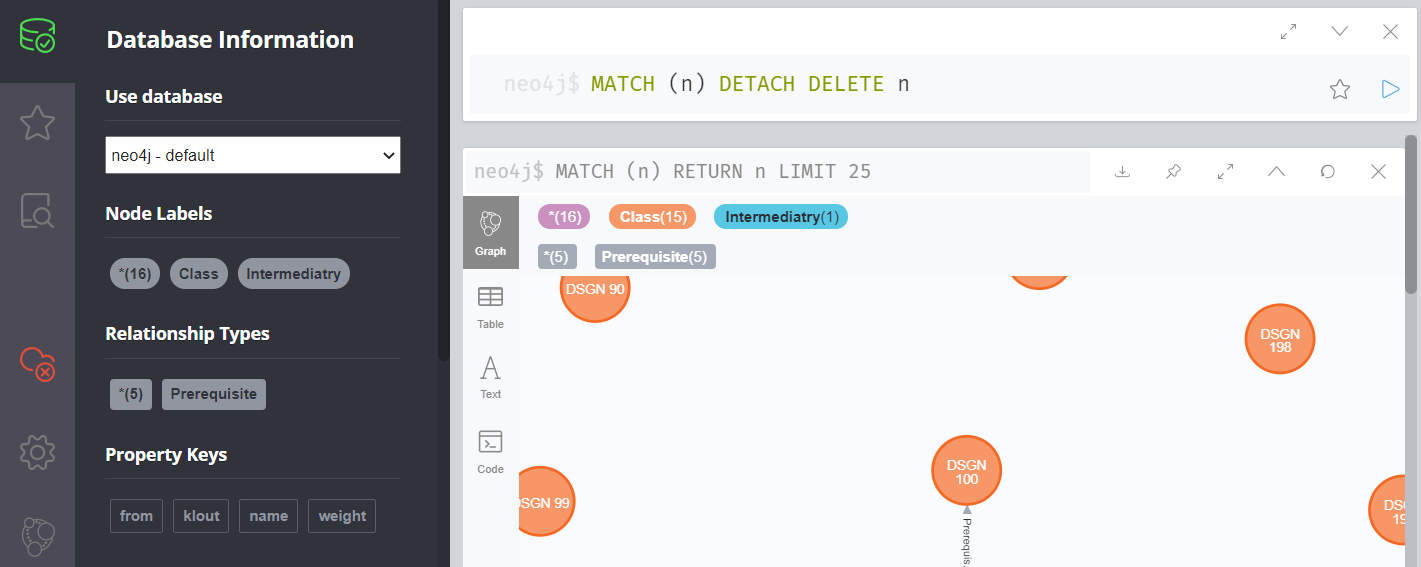